## Лабораторная работа 3
### Четвериков Илья БПМ171 Вариант 29

#### Задача 1.1.29

Дан ряд $\sum_{n=0}^{\infty} a_n$. Найти сумму ряда аналитически. Вычислить значения частичных сумм ряда $S_N = \sum_{n=0}^{N} a_n$ и найти величину погрешности при $N = 10, 10^2, 10^3, 10^4, 10^5$. Построить гистограмму зависимости верных цифр результата от $N$.

$$S_N = \sum_{n=0}^N \frac{72}{n^2 + 6n + 8}$$

Аналитически найдем значение суммы ряда



$$S_N = \sum_{n=0}^N \frac{72}{n^2 + 6n + 8} = 72\sum_{n=0}^N \frac{1}{(n+2)(n+4)} = \frac{72}{2} \sum_{n=0}^N (\frac{1}{n+2} - \frac{1}{n+4}) = \frac{72}{2}(\frac{1}{2} + \frac{1}{3} - \frac{1}{N+3} - \frac{1}{N+4})$$
$$ S = \lim_{N\to\infty} S_N = \frac{72}{2}(\frac{1}{2} + \frac{1}{3}) = \frac{72}{2} \frac{5}{6}=30$$

Программно вычислим

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_partial_sum(N):
    array = np.arange(N+1, dtype=float)
    return (72.0/(array**2+6*array+8)).sum()

N = [10, 100, 1000, 10000, 100000]
sum_array = []
abs_error_array = []

answer = 30.0
for n in N:
    S = get_partial_sum(n)
    sum_array.append(S)
    abs_error_array.append(answer - S)
    
import pandas as pd
data = pd.DataFrame(list(zip(N, sum_array, abs_error_array)), columns=["N","Value","Absolute error"])
data

,N,Value,Absolute error
0,10,24.659341,5.340659
1,100,29.304332,0.695668
2,1000,29.928251,0.071749
3,10000,29.992803,0.007197
4,100000,29.999280,0.000720


Значащую цифру числа называют верной, если абсолютная погрешность числа не превосходит единицы
разряда, соответствующего этой цифре. Найдем количество верных цифр и построим гитограмму.

        N      Value  Deviation  Right digits
0      10  24.659341   5.340659             1
1     100  29.304332   0.695668             2
2    1000  29.928251   0.071749             3
3   10000  29.992803   0.007197             4
4  100000  29.999280   0.000720             5


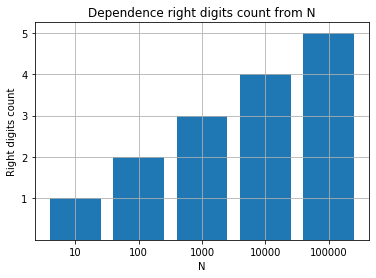

In [60]:
right_digits_array = [1, 2, 3, 4, 5]
data['Right digits'] = right_digits_array
print(data)

plt.title('Dependence right digits count from N')
plt.ylabel('Right digits count')
plt.xlabel('N')
plt.bar(range(len(right_digits_array)), right_digits_array)
plt.grid()
plt.yticks(right_digits_array)
plt.xticks(range(5), data.N.values)
plt.show()

#### Задача 1.8
Составить программу, моделирующую вычисления на ЭВМ с ограниченной разрядностью $m$. Решить задачу 1.1 для случая $N = 10000$, используя эту программу. Составить график зависимости погрешности от количества разрядов $m = 4, 5, \dots, 8$

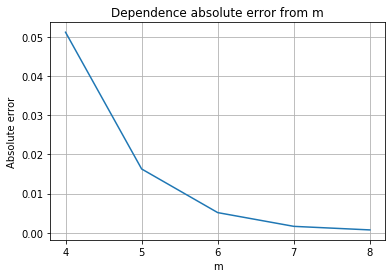

In [6]:
def get_partial_sum_m(N, m):
    array = np.arange(N+1, dtype=float)
    seq = np.around(72.0/(array**2+6*array+8), m)
    S = 0.0
    for i in seq:
        S = np.around(S + i, m) 
    return S

N = 100000
m_array = np.arange(4, 9)
abs_errors_array = []
for m in m_array:
    abs_errors_array.append(answer - get_partial_sum_m(N, m))
    
plt.title('Dependence absolute error from m')
plt.ylabel('Absolute error')
plt.xlabel('m')
plt.plot(m_array, abs_errors_array)
plt.xticks(m_array)
plt.grid()

#### Задача 1.2.2

Дана матрица $A = \begin{pmatrix} a_{11} & a_{12} & a_{13}\\ a_{21} & a_{22} & a_{23}\\ a_{31} & a_{32} & a_{33}\\ \end{pmatrix}$. В каждый из диагональных элементов матрицы A по очереди внести погрешность в 1%. Как изменился определитель матрицы А? Указать количество верных цифр и вычислить величину относительной погрешности определителя в каждом случае.
$$A = \begin{pmatrix} 30 & 34 & 19 \\ 314 & 354 & 200 \\ 2 & 8 & 13 \end{pmatrix}$$

In [15]:
A = np.array([[30, 34, 19],
              [314, 354, 200],
              [2, 8, 13]], dtype=np.float)

det = np.linalg.det(A)

new_dets_arr = []
rel_errors_arr = []
abs_errors_arr = []

for i in range(len(A)):
    A_copy = A.copy()
    A_copy[i,i] *= 1.01
    new_det = np.linalg.det(A_copy)
    abs_error = np.abs(det - new_det)
    rel_error = abs_error / np.abs(det)
    new_dets_arr.append(new_det)
    rel_errors_arr.append(rel_error)
    abs_errors_arr.append(abs_error)
    
print("Original determinant {}".format(det))
data = pd.DataFrame({
    'Determinant': new_dets_arr,
    'Relative error': rel_errors_arr,
    'Absolute error': abs_errors_arr
})
data

Original determinant -851.9999999999853


,Determinant,Relative error,Absolute error
0,48.60,1.057042,900.60
1,394.08,1.462535,1246.08
2,-859.28,0.008545,7.28


In [16]:
right_digits_arr = [0, 0, 2]
data['Right digits count'] = right_digits_arr
data

,Determinant,Relative error,Absolute error,Right digits count
0,48.60,1.057042,900.60,0
1,394.08,1.462535,1246.08,0
2,-859.28,0.008545,7.28,2


#### Задание 1.6
Для пакета MATHCAD найти значения машинного нуля, машинной бесконечности, машинного эпсилон. Здесь использовал Matlab.
Скрипт main.m прилагается.

Вывод:  
Single precision machine zero: 1.401298e-45  
Double precision machine zero: 4.940656e-324  
Single precision machine infinity: 1.701412e+38  
Double precision machine infinity: 8.988466e+307  
Single precision machine epsilon: 1.192093e-07  
Double precision machine epsilon: 2.220446e-16  

#### Задание 1.7
Вычислить значения машинного нуля, машинной бесконечности, машинного эпсилон в режимах одинарной и двойной точности на алгоритмическом языке Python. Сравнить результаты с результатами задачи 1.6.

In [48]:
def machine_zero(float_type):
    i = 0
    number = 1
    while float_type(number) != 0:
        number /= 2
        i += 1
    return 2 ** (1 - i)

def machine_infinity(float_type):
    i = 0
    number = 1
    while float_type(number) != np.inf:
        number = 2.0 * number
        i += 1
    return 2.0 ** (i - 1)

def machine_epsilon(float_type):
    i = 0
    number = 1
    while float_type(1.0 + number) != 1.0:
        number /= 2
        i += 1
    return 2 ** (1 - i)

print('Single precision machine zero: {}'.format(machine_zero(np.float32)))
print('Double precision machine zero: {}'.format(machine_zero(np.float64)))
print('Single precision machine infinity: {}'.format(machine_infinity(np.float32)))
print('Double precision machine infinity: {}'.format(machine_infinity(np.float64)))
print('Single precision machine epsilon: {}'.format(machine_epsilon(np.float32)))
print('Double precision machine epsilon: {}'.format(machine_epsilon(np.float64)))

Single precision machine zero: 1.401298464324817e-45
Double precision machine zero: 5e-324
Single precision machine infinity: 1.7014118346046923e+38
Double precision machine infinity: 8.98846567431158e+307
Single precision machine epsilon: 1.1920928955078125e-07
Double precision machine epsilon: 2.220446049250313e-16


Результаты совпали

#### Задача 1.10.6
Три вектора $a1, a2, a3$ заданы своими координатами в базисе $i, j, k$. Что можно сказать о компланарности этих векторов, если:

1) координаты векторов заданы точно;
2) координаты векторов заданы приближённо с относительной погрешностью а) $\delta = \alpha%$ ; б) $\delta = \beta%$.

$$ a1=(9, 17, 1)$$
$$ a2=(27, 35, -18)$$
$$ a3=(6, 14, 4)$$
$$ \alpha=0.5, \beta=0.1$$

Критерий компланарности: три вектора компланарны тогда и только тогда, когда определитель матрицы, составленный из их координат равен нулю.
Определитель как функция на компакте имеет максимум и минимум на границе компакта.

In [84]:
import itertools

A = np.array([[9, 17, 1],
              [27, 35, -18],
              [6, 14, 4]], dtype=np.float)

det = np.linalg.det(A)
print("1) Original determinant {}".format(det))

def det_with_error(max_relative_error):
    m = A.shape[0]
    n = A.shape[1]

    min_det = machine_infinity(np.float64)
    max_det = -machine_infinity(np.float64)
    for binary_vec in itertools.product([0, 1], repeat=m*n):
        eps_matrix = np.array(binary_vec)
        eps_matrix[eps_matrix == 0] = -1
        eps_matrix = eps_matrix * max_relative_error
        eps_matrix = eps_matrix.reshape(A.shape)
     
        det = np.linalg.det(A+eps_matrix*A)
        if (det > max_det):
            max_det = det
        if (det < min_det):
            min_det = det
    return min_det, max_det

print("2)\n")
for d in [0.005, 0.001]:
    m, M = det_with_error(d)
    if (0 < M and m < 0):
        print("Relative error {}. Determinant is possible to be 0. m={}, M={}".format(d, m, M))
    else:
        print("Relative error {}. Determinant is not possible to be 0. m={}, M={}".format(d, m, M))

1) Original determinant 23.999999999999908
2)

Relative error 0.005. Determinant is possible to be 0. m=-53.83750500000033, M=101.92270500000025
Relative error 0.001. Determinant is not possible to be 0. m=8.42570315999993, M=39.577704839999946


Когда координаты заданы точно - вектора не компланарны. Когда погрешность 0.005 - могут быть компланарны а могут и нет. Когда относительная погрешность 0.001 - всегда не компланарны.